<a href="https://colab.research.google.com/github/preetmodi/Credit-Risk-Analytics/blob/main/Woe_calculation_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo echo -ne '\n' | sudo add-apt-repository ppa:alessandro-strada/ppa >/dev/null 2>&1 # note: >/dev/null 2>&1 is used to supress printing
!sudo apt update >/dev/null 2>&1
!sudo apt install google-drive-ocamlfuse >/dev/null 2>&1
!google-drive-ocamlfuse
!sudo apt-get install w3m >/dev/null 2>&1 # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop >/dev/null 2>&1 # to set default browser 
%cd /content
!mkdir gdrive
%cd gdrive
!mkdir "My Drive"
!google-drive-ocamlfuse "/content/gdrive/My Drive"

/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force&state=98inmKp23JNSJ69NFugdwztyFUAHdA%2FNyIz3hVf22cU'
/bin/sh: 1: firefox: not found
/bin/sh: 1: google-chrome: not found
/bin/sh: 1: chromium-browser: not found
/bin/sh: 1: open: not found
Cannot retrieve auth tokens.
Failure("Error opening URL:https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fww

In [ ]:
pip install scorecardpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 KB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.2-py3-none-any.whl size=57843 sha256=35f8eb486bb118f88122055a5a059232f7b66568eb348cc3922c1d8bc36ea467
  Stored in directory: /root/.cache/pip/wheels/16/7d/83/3c16d429c2ab9d345b31613f9f802432453fbf8c8bbaf8121e
Successfully built scorecardpy


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scorecardpy as sc
%matplotlib inline

In [ ]:
%cd /content/gdrive/My Drive/Data/
# df = pd.read_csv("transformed_data.csv", low_memory=False, index_col=0)

/content/gdrive/My Drive/Data


## TO be added in Data Cleaning

In [ ]:
# To have everything except id
# df = df.iloc[:,1:]
# df = df.drop(columns = ['funded_amnt', 'funded_amnt_inv'])

# df['mths_since_recent_inq'][df['mths_since_recent_inq'] == 0] = 0.5
# df['mths_since_recent_inq'] = 1/df['mths_since_recent_inq']
# df['mths_since_recent_inq'] = df['mths_since_recent_inq'].fillna(0)

In [ ]:

# train, test = sc.split_df(df.iloc[:,1:],
#                           y = 'Default',
#                           ratio = 0.7,
#                           seed = 251256517).values()

In [ ]:
# train.to_csv('Train.csv')
# test.to_csv('Test.csv')
train = pd.read_csv("Train.csv", low_memory=False, index_col=0)
test = pd.read_csv("Test.csv", low_memory=False, index_col=0)


In [ ]:
train['Default']

0          0
2          0
6          1
8          0
10         0
          ..
1280637    0
1280638    0
1280641    0
1280643    0
1280644    1
Name: Default, Length: 848276, dtype: int64

In [ ]:
# train_last_19.iloc[:, np.c_[:3, ]

Index(['num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'Default', 'coborrower_inc', 'bank_dlq', 'il_acc', 'payment_history',
       'collateral_coverage_ratio'],
      dtype='object')

In [ ]:
# train_last_19 = train.iloc[:,38:]
# train_last_19['Default']
# ['Default'] = train['Default']
train.Default = train.Default.astype(float)
train.bank_dlq = train.bank_dlq.astype(float)
train.il_acc = train.il_acc.astype(float)
train.dtypes

loan_amnt                     float64
term                           object
installment                   float64
home_ownership                 object
annual_inc                    float64
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
application_type               object
dti_joint                     float64
tot_coll_amt                  float64
tot_cur_bal                   float64
total_bal_il                  float64
il_util                       float64
acc_open_pas

In [ ]:
train['num_rev_accts']

dtype('float64')

In [ ]:
train_last_19 = train.iloc[:, 38:].drop(columns=['num_rev_accts', 'percent_bc_gt_75'])
# train_last_19['Default'] = train['Default']
# train_last_19[]
# bins = []
# for column in train_last_19.columns:
#     temp = train_last_19[column].to_frame()
#     temp['Default'] = train['Default']
bins = sc.woebin(train_last_19, y = 'Default', 
                min_perc_fine_bin=0.01, # How many bins to cut initially into
                min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                stop_limit=0.02, # Minimum information value 
                max_num_bin=15, # Maximum number of bins
                method='tree'
                )
        

[INFO] creating woe binning ...
Binning on 848276 rows and 17 columns in 00:01:07


{'num_il_tl': <Figure size 432x288 with 2 Axes>,
 'total_bc_limit': <Figure size 432x288 with 2 Axes>,
 'tax_liens': <Figure size 432x288 with 2 Axes>,
 'bank_dlq': <Figure size 432x288 with 2 Axes>,
 'num_sats': <Figure size 432x288 with 2 Axes>,
 'il_acc': <Figure size 432x288 with 2 Axes>,
 'pub_rec_bankruptcies': <Figure size 432x288 with 2 Axes>,
 'total_il_high_credit_limit': <Figure size 432x288 with 2 Axes>,
 'total_bal_ex_mort': <Figure size 432x288 with 2 Axes>,
 'num_rev_tl_bal_gt_0': <Figure size 432x288 with 2 Axes>,
 'coborrower_inc': <Figure size 432x288 with 2 Axes>,
 'tot_hi_cred_lim': <Figure size 432x288 with 2 Axes>,
 'payment_history': <Figure size 432x288 with 2 Axes>,
 'pct_tl_nvr_dlq': <Figure size 432x288 with 2 Axes>,
 'num_op_rev_tl': <Figure size 432x288 with 2 Axes>,
 'collateral_coverage_ratio': <Figure size 432x288 with 2 Axes>}

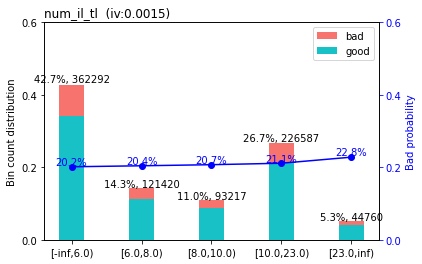

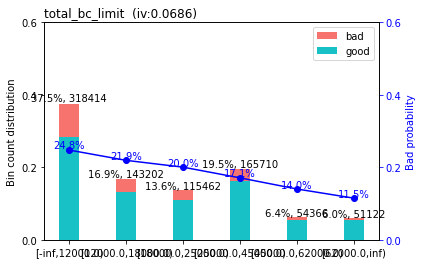

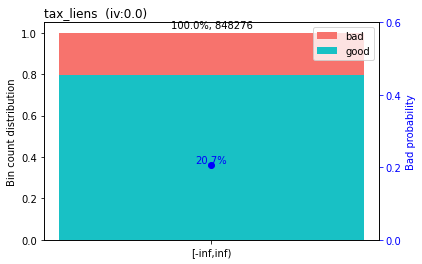

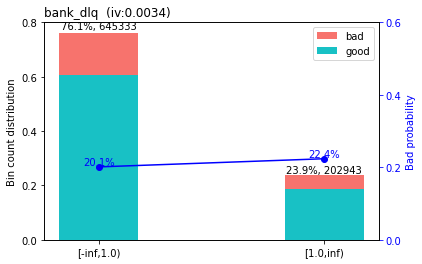

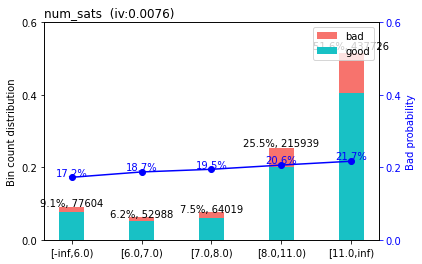

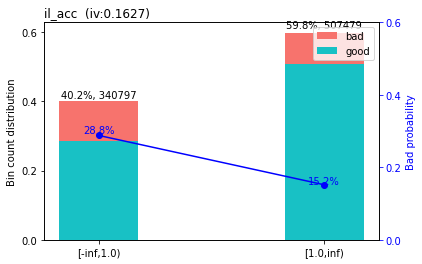

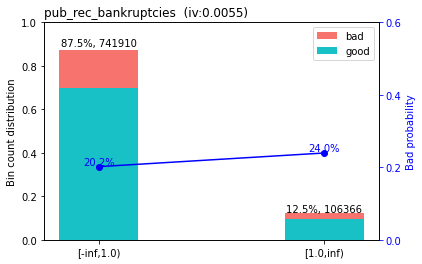

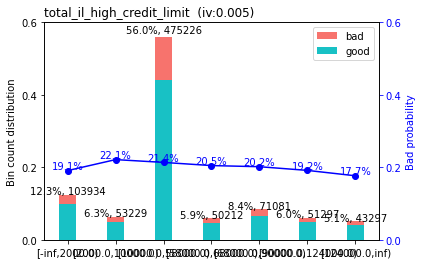

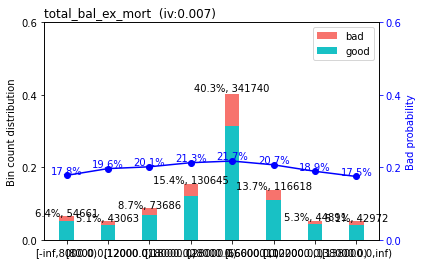

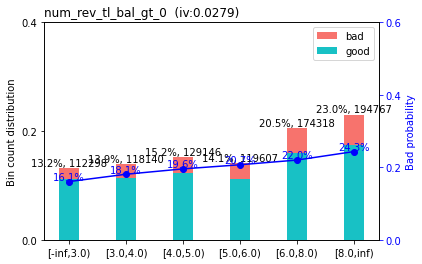

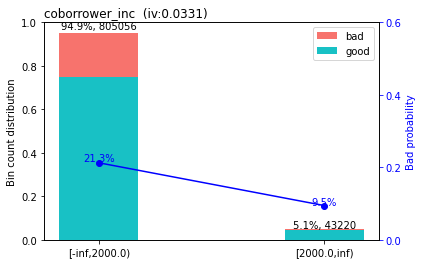

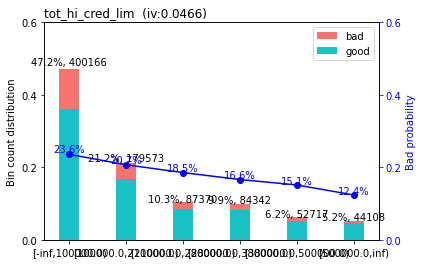

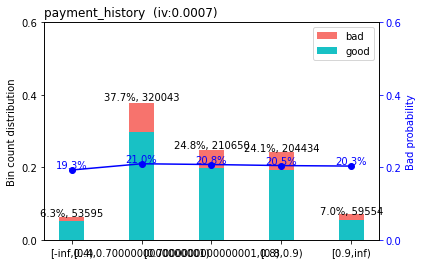

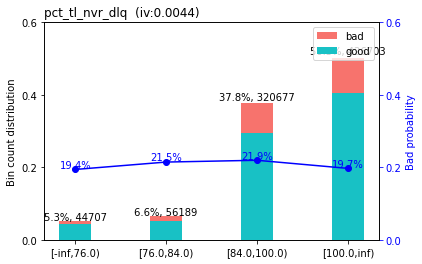

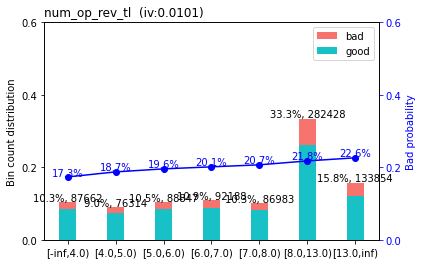

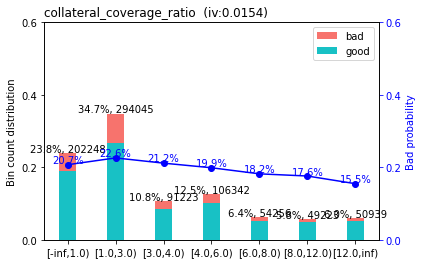

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sc.woebin_plot(bins)

In [ ]:
sc.woebin(train.drop(columns= ['title', 'zip_code', 'addr_state']), y = 'Default', 
                 min_perc_fine_bin=0.01, # How many bins to cut initially into
                 min_perc_coarse_bin=0.03,  # Minimum percentage per final bin
                 stop_limit=0.02, # Minimum information value 
                 max_num_bin=8, # Maximum number of bins
                 method='tree'
                 )

[INFO] creating woe binning ...


/usr/local/lib/python3.9/dist-packages/scorecardpy/condition_fun.py:28: UserWarning: There are 1 date/time type columns are removed from input dataset. 
 (ColumnNames: earliest_cr_line)
  warnings.warn("There are {} date/time type columns are removed from input dataset. \n (ColumnNames: {})".format(len(datetime_cols), ', '.join(datetime_cols)))


TypeError: ignored